In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

new_col = [
    'ExecutionNumber','KataInfo','KataNumber','AthleteNumber','Frame','N_ELEM','S','A','STR','BLK','REY','HKD','FUD','UHD','DZKD','KOKD','NKSD','UPP',
    'MDL','LOW','SIML','L','R','HND','UPA','SD','CRCL','OUTS','DW','SWNG','MVFRW','MVBCK','MVLFT','MVRHT','ROT45','ROT180','FSTF','FSTHMR','HNDKNF',
    'ERRD','ERRM','ERRS','ERRB','Time','X_24','Y_24','Z_24','X_26','Y_26','Z_26','X_28','Y_28','Z_28','X_30','Y_30','Z_30','X_32','Y_32','Z_32',
    'X_23','Y_23','Z_23','X_25','Y_25','Z_25','X_27','Y_27','Z_27','X_29','Y_29','Z_29','X_31','Y_31','Z_31','X_0','Y_0','Z_0','X_5','Y_5','Z_5',
    'X_2','Y_2','Z_2','X_12','Y_12','Z_12','X_14','Y_14','Z_14','X_16','Y_16','Z_16','X_18','Y_18','Z_18','X_20','Y_20','Z_20','X_22','Y_22','Z_22',
    'X_11','Y_11','Z_11','X_13','Y_13','Z_13','X_15','Y_15','Z_15','X_17','Y_17','Z_17','X_19','Y_19','Z_19','X_21','Y_21','Z_21'
    ]
fn_test = [
    r"C:\temp\Cam_1_1920x1080x60\20240209_181457.csv",
    r"C:\temp\Cam_2_1920x1080x60\IMG_3468.csv",
    r"C:\temp\Cam_3_1920x1080x60\20240209_181458.csv",
    r"C:\temp\Cam_4_1920x1080x60\Тайкёку соно ити 1.csv"
]
# data = pd.read_csv(fn_test[0],delimiter=';')
fn_train=[
    r'DS\DATASET\YX_DS01.csv',
    r'DS\DATASET\YX_DS02.csv',
    r'DS\DATASET\YX_DS03.csv',
    r'DS\DATASET\YX_DS04.csv',
    r'DS\DATASET\YX_DS05.csv'
    ]

file_train = r'DS\train_base.csv'
df = pd.read_csv(fn_train[0],delimiter=',')
for i in range(1,len(fn_train)):
    data = pd.read_csv(fn_train[i],delimiter=',')
    df = pd.concat([df,data])
df.columns = new_col
# # Вычисляем среднюю точку между бедрами
center_x = (df['X_23'] + df['X_24']) / 2
center_y = (df['Y_23'] + df['Y_24']) / 2
center_z = (df['Z_23'] + df['Z_24']) / 2

coord = [col for col in df.columns if any(substr in col for substr in ['X_', 'Y_', 'Z_'])]
# Нормализация позы относительно центра
for col in coord:
    if 'X_' in col:
        df[col] -= center_x
    elif 'Y_' in col:
        df[col] -= center_y
        df[col] *= -1.242
    elif 'Z_' in col:
        df[col] -= center_z

binary_attribute = ['S','A','STR','BLK','REY','HKD','FUD','UHD','DZKD','KOKD','NKSD','UPP','MDL','LOW','SIML','L','R','HND','UPA','SD','CRCL','OUTS',
           'DW','SWNG','MVFRW','MVBCK','MVLFT','MVRHT','ROT45','ROT180','FSTF','FSTHMR','HNDKNF','ERRD','ERRM','ERRS','ERRB']
df.insert(6,'s_attr',value="") 
df['s_attr'] = df.apply(lambda x: ''.join(str(x[s]) for s in binary_attribute), axis=1)
ord_enc = OrdinalEncoder()
df["bin_y"] = ord_enc.fit_transform(df[["s_attr"]])
# ord_enc.categories_[0][30] - decode
sorted_columns = ['X_0','Y_0','Z_0','X_2','Y_2','Z_2','X_5','Y_5','Z_5','X_11','Y_11','Z_11','X_12','Y_12','Z_12','X_13','Y_13','Z_13',
                  'X_14','Y_14','Z_14','X_15','Y_15','Z_15','X_16','Y_16','Z_16','X_17','Y_17','Z_17','X_18','Y_18','Z_18','X_19','Y_19','Z_19',
                  'X_20','Y_20','Z_20','X_21','Y_21','Z_21','X_22','Y_22','Z_22','X_23','Y_23','Z_23','X_24','Y_24','Z_24','X_25','Y_25','Z_25',
                  'X_26','Y_26','Z_26','X_27','Y_27','Z_27','X_28','Y_28','Z_28','X_29','Y_29','Z_29','X_30','Y_30','Z_30','X_31','Y_31','Z_31',
                  'X_32','Y_32','Z_32','bin_y']

df_xy = df[sorted_columns]
df_xy.to_csv(file_train, sep=';', index=False)

In [50]:
# print(df.s_attr.nunique())
# df.s_attr.value_counts()
# df.dtypes

ord_enc = OrdinalEncoder()
df["bin_y"] = ord_enc.fit_transform(df[["s_attr"]])
print(df[['bin_y','s_attr']].head(10))
print(ord_enc.categories_[0][30])
df_xy.describe(include='all')

   bin_y                                 s_attr
0   30.0  1000000010000000000000000010000000000
1   30.0  1000000010000000000000000010000000000
2   30.0  1000000010000000000000000010000000000
3   30.0  1000000010000000000000000010000000000
4   30.0  1000000010000000000000000010000000000
5   30.0  1000000010000000000000000010000000000
6   30.0  1000000010000000000000000010000000000
7   30.0  1000000010000000000000000010000000000
8   30.0  1000000010000000000000000010000000000
9   30.0  1000000010000000000000000010000000000
1000000010000000000000000010000000000


,X_0,Y_0,Z_0,X_2,Y_2,Z_2,X_5,Y_5,Z_5,X_11,...,X_30,Y_30,Z_30,X_31,Y_31,Z_31,X_32,Y_32,Z_32,bin_y
count,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,...,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000
mean,0.006060,0.534810,0.001308,0.004900,0.565264,0.004794,0.006932,0.564869,0.003545,-0.001511,...,0.004760,-0.573245,0.002071,-0.004250,-0.596084,-0.005828,0.008338,-0.599213,0.014238,8.837744
std,0.118581,0.041698,0.127909,0.109419,0.041607,0.117012,0.109327,0.041871,0.117451,0.122237,...,0.233003,0.076109,0.255926,0.245743,0.071663,0.280364,0.257894,0.069407,0.285694,6.825631
min,-0.314659,0.343777,-0.294157,-0.296251,0.358960,-0.274306,-0.296785,0.359847,-0.284661,-0.243979,...,-1.097125,-0.851554,-0.639004,-0.633936,-0.839404,-0.558483,-0.603913,-0.813430,-0.590958,0.000000
25%,-0.062759,0.506054,-0.093090,-0.060135,0.536374,-0.075622,-0.056932,0.535437,-0.083713,-0.098032,...,-0.155032,-0.616721,-0.182737,-0.201300,-0.636017,-0.255795,-0.196353,-0.644976,-0.211442,7.000000
50%,0.012082,0.531689,0.003344,0.012691,0.562129,0.006016,0.010941,0.562218,0.003849,-0.004629,...,0.010078,-0.574341,0.008896,-0.007134,-0.600176,-0.021050,0.024840,-0.606754,0.029590,7.000000
75%,0.081841,0.561137,0.101021,0.074261,0.590755,0.088356,0.077733,0.591959,0.096181,0.090266,...,0.158031,-0.513951,0.171541,0.188345,-0.531248,0.231531,0.212486,-0.535530,0.271078,11.000000
max,0.275741,0.662846,0.292829,0.258691,0.693771,0.285664,0.265621,0.692380,0.270531,1.920938,...,0.652033,-0.257650,0.772537,0.577878,-0.379846,0.813864,0.587884,-0.246013,0.706829,34.000000


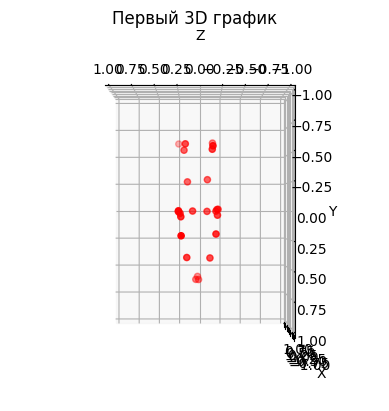

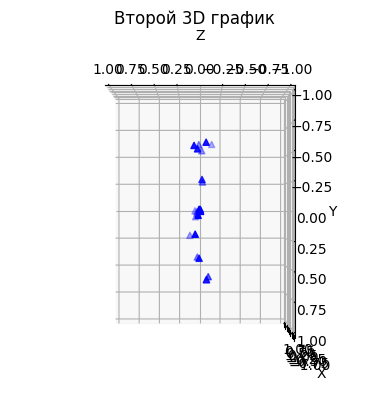

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lines = [
    [0,2],
    [0,5],
    [14,16],
    [12,14],
    [12,11],
    [11,13],
    [13,15],
    [12,24],
    [11,23],
    [23,24],
    [24,26],
    [23,25],
    [26,28],
    [25,27],
    [28,32],
    [28,30],
    [30,32],
    [27,29],
    [27,31],
    [29,31]
    ]

# Функция для поворота точек относительно заданной оси и угла
def rotate_points(points, axis, angle):
    """
    points - np.array 1D
    axis - вокруг какой оси вращаем (x,y,z)
    angle - угол вращения в градусах
    """
    angle = np.pi/180*angle # перевод в радианы
    points = points.reshape(-1,3) # Группируем по 3 точки(x,y,z)
    
    # Нормализация оси вращения
    axis = axis / np.linalg.norm(axis)
    
    # Создание матрицы вращения
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotation_matrix = np.array([[cos_angle + axis[0]**2 * (1 - cos_angle),
                                  axis[0] * axis[1] * (1 - cos_angle) - axis[2] * sin_angle,
                                  axis[0] * axis[2] * (1 - cos_angle) + axis[1] * sin_angle],
                                 [axis[0] * axis[1] * (1 - cos_angle) + axis[2] * sin_angle,
                                  cos_angle + axis[1]**2 * (1 - cos_angle),
                                  axis[1] * axis[2] * (1 - cos_angle) - axis[0] * sin_angle],
                                 [axis[0] * axis[2] * (1 - cos_angle) - axis[1] * sin_angle,
                                  axis[1] * axis[2] * (1 - cos_angle) + axis[0] * sin_angle,
                                  cos_angle + axis[2]**2 * (1 - cos_angle)]])
    
    # Применение поворота к точкам
    rotated_points = np.dot(points, rotation_matrix.T)
    
    return rotated_points.reshape(-1)

# Пример использования функции rotate_points
angle = 90  # Угол поворота в градусах
axis = np.array([0, 1, 0])  # Ось вращения
fn = r"DS\train_base.csv"
df = pd.read_csv(fn,delimiter=";")
points = df.iloc[1,:-1].to_numpy()
#points = np.array([0,-1,0,0,1,0,-0.5,-0.5,0,0.5,-0.5,0])
rotated_points = rotate_points(points, axis, angle)

# print("Исходные точки:")
# print(points)
# print("\nПовернутые точки:")
# print(rotated_points)

# Создание первого графика
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
lm = 1
ax1.set_xlim([-lm, lm])
ax1.set_ylim([-lm, lm])
ax1.set_zlim([-lm, lm])
p3d = points.reshape(-1,3)
ax1.scatter(p3d[:,0], p3d[:,1], p3d[:,2], c='r', marker='o')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Первый 3D график')

# Создание второго графика
fig2 = plt.figure()
t3d = rotated_points.reshape(-1,3)
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(t3d[:,0], t3d[:,1], t3d[:,2], c='b', marker='^')
ax2.set_xlim([-lm, lm])
ax2.set_ylim([-lm, lm])
ax2.set_zlim([-lm, lm])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Второй 3D график')
ax1.view_init(elev=180, azim=00, roll=270) # Поворачиваем оси
ax2.view_init(elev=180, azim=00, roll=270) # Поворачиваем оси

plt.show()


(180,)


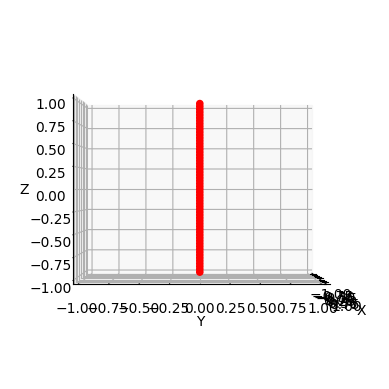

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Создание данных для 3D графика
X = np.arange(-6, 6, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
Y = np.sin(X)
Z = np.arange(-1, 1, 0.1)

p = np.arange(-1, 1, 0.01112)
print(p.shape)
p3d = p.reshape(-1,3)
p3d[:,1] = 0 
p3d[:,2] = 0
p = p3d.reshape(-1)
#print(p)
angle = 90  # Угол поворота в градусах
axis = np.array([0, 1, 0])  # Ось вращения
p = rotate_points(p, axis, angle)
p3d = p.reshape(-1,3)

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lm = 1
ax.set_xlim([-lm, lm])
ax.set_ylim([-lm, lm])
ax.set_zlim([-lm, lm])
ax.scatter(p3d[:,0], p3d[:,1], p3d[:,2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.set_proj_type('persp') # persp ortho
ax.view_init(elev=0, azim=0, roll=0)

plt.show()

In [ ]:
# Функция для поворота точек относительно заданной оси и угла
def rotate_points(points, axis, angle):
    """
    points - np.array 1D
    axis - вокруг какой оси вращаем (x,y,z)
    angle - угол вращения в градусах
    """
    angle = np.pi/180*angle # перевод в радианы
    points = points.reshape(-1,3) # Группируем по 3 точки(x,y,z)
    
    # Нормализация оси вращения
    axis = axis / np.linalg.norm(axis)
    
    # Создание матрицы вращения
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotation_matrix = np.array([[cos_angle + axis[0]**2 * (1 - cos_angle),
                                  axis[0] * axis[1] * (1 - cos_angle) - axis[2] * sin_angle,
                                  axis[0] * axis[2] * (1 - cos_angle) + axis[1] * sin_angle],
                                 [axis[0] * axis[1] * (1 - cos_angle) + axis[2] * sin_angle,
                                  cos_angle + axis[1]**2 * (1 - cos_angle),
                                  axis[1] * axis[2] * (1 - cos_angle) - axis[0] * sin_angle],
                                 [axis[0] * axis[2] * (1 - cos_angle) - axis[1] * sin_angle,
                                  axis[1] * axis[2] * (1 - cos_angle) + axis[0] * sin_angle,
                                  cos_angle + axis[2]**2 * (1 - cos_angle)]])
    
    # Применение поворота к точкам
    rotated_points = np.dot(points, rotation_matrix.T)
    
    return rotated_points.reshape(-1)

# Обогащение датасета, поворотом модели на 360 градусов с шагом в 3
angle = np.arange(3, 360, 3)  # Углы поворота в градусах
axis = np.array([0, 1, 0])  # Ось вращения
fn = r"DS\train_base.csv"
df = pd.read_csv(fn,delimiter=";")
points = df.iloc[1,:-1].to_numpy()
#points = np.array([0,-1,0,0,1,0,-0.5,-0.5,0,0.5,-0.5,0])
rotated_points = rotate_points(points, axis, angle)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

new_col = [
    'ExecutionNumber','KataInfo','KataNumber','AthleteNumber','Frame','N_ELEM','S','A','STR','BLK','REY','HKD','FUD','UHD','DZKD','KOKD','NKSD','UPP',
    'MDL','LOW','SIML','L','R','HND','UPA','SD','CRCL','OUTS','DW','SWNG','MVFRW','MVBCK','MVLFT','MVRHT','ROT45','ROT180','FSTF','FSTHMR','HNDKNF',
    'ERRD','ERRM','ERRS','ERRB','Time','X_24','Y_24','Z_24','X_26','Y_26','Z_26','X_28','Y_28','Z_28','X_30','Y_30','Z_30','X_32','Y_32','Z_32',
    'X_23','Y_23','Z_23','X_25','Y_25','Z_25','X_27','Y_27','Z_27','X_29','Y_29','Z_29','X_31','Y_31','Z_31','X_0','Y_0','Z_0','X_5','Y_5','Z_5',
    'X_2','Y_2','Z_2','X_12','Y_12','Z_12','X_14','Y_14','Z_14','X_16','Y_16','Z_16','X_18','Y_18','Z_18','X_20','Y_20','Z_20','X_22','Y_22','Z_22',
    'X_11','Y_11','Z_11','X_13','Y_13','Z_13','X_15','Y_15','Z_15','X_17','Y_17','Z_17','X_19','Y_19','Z_19','X_21','Y_21','Z_21'
    ]

def mean_z0(cam,nfile):
    if cam==1:
        fn1 = [
            r"C:\temp\Cam_1_1920x1080x60\20240209_181457.csv",
            r"C:\temp\Cam_2_1920x1080x60\IMG_3468.csv",
            r"C:\temp\Cam_3_1920x1080x60\20240209_181458.csv",
            r"C:\temp\Cam_4_1920x1080x60\Тайкёку соно ити 1.csv",
            r"DS\train_base.csv"
        ]
        data = pd.read_csv(fn1[nfile],delimiter=';')
    else:
        fn1=[
            r'DS\DATASET\YX_DS01.csv',
            r'DS\DATASET\YX_DS02.csv',
            r'DS\DATASET\YX_DS03.csv',
            r'DS\DATASET\YX_DS04.csv',
            r'DS\DATASET\YX_DS05.csv'
            ]
        data = pd.read_csv(fn1[nfile])
        data.columns = new_col
        # # Вычисляем среднюю точку между бедрами
        center_x = (data['X_23'] + data['X_24']) / 2
        center_y = (data['Y_23'] + data['Y_24']) / 2
        center_z = (data['Z_23'] + data['Z_24']) / 2

        coord = [col for col in data.columns if any(substr in col for substr in ['X_', 'Y_', 'Z_'])]
        # Нормализация позы относительно центра
        for col in coord:
            if 'X_' in col:
                data[col] -= center_x
            elif 'Y_' in col:
                data[col] -= center_y
                data[col] *= -1
            elif 'Z_' in col:
                data[col] -= center_z
        #data.to_csv(r"DS\centr.csv", sep=';', index=False)
    return data.Y_0.median()

z_1=[]
z_4=[]
for i in range(5):
    z_1.append(mean_z0(1,i))
    z_4.append(mean_z0(4,i))
    print(f'Коэффициент в файле {i}: {z_1[i]} {z_4[i]}')
print(f'Коэффициент средний: {sum(z_1)/-0.516337/5}')

Коэффициент в файле 0: -0.6428346633911133 -0.5163366891748833
Коэффициент в файле 1: -0.6329514980316162 -0.49083865745811855
Коэффициент в файле 2: -0.6449179947376251 -0.5525091907494236
Коэффициент в файле 3: -0.6447827219963074 -0.5278695245680771
Коэффициент в файле 4: -0.6603571674909939 -0.5935073472289324
Коэффициент средний: 1.2495110928125064


### Знакомство с **TimeseriesGenerator**

x_train – временной ряд, из которого собираются данные.

y_train – целевые значения. Должны быть той же длины что и x_train.

length – длина выходных последовательностей, окно, которым вы пройдетесь по данным.

sampling_rate – размер шага при выборке данных в x_train. Если x_train последовательность от 0 до 50, то при rate=1 последовательность выглядит так:

  [0, 1, 2, 3, 4].
При rate=2 в последовательность попадет каждый второй элемент:

  [0, 2, 4, 6, 8]
и так далее.

stride – указывает, на сколько элементов произойдет сдвиг при смене элемента. У того же x_train при stride=1 первый и второй элемент выглядят так:

  [0, 1, 2, 3, 4, 5] [1, 2, 3, 4, 5, 6].

  При stride=2:

  [0, 1, 2, 3, 4, 5] [2, 3, 4, 5, 6, 7].
batch_size – сколько элементов вернет генератор при обращении к нему. Теперь, когда основные параметры понятны, перейдите к практике. Для этого опишите функцию с генератором и выводом информации на экран.

In [ ]:
# Работа с массивами
import numpy as np

# Работа с таблицами
import pandas as pd

# Классы-конструкторы моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Генератор выборки временных рядов
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Нормировщики
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Отрисовка графиков
import matplotlib.pyplot as plt

# Отрисовка графики в ячейке colab
%matplotlib inline

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

# Функция создания пробного генератора и вывода его результатов на экран
# На входе - имитация выборок x_train, y_train
def show_gen(x_train, y_train, length=10, batch_size=5):
    # Создание генератора TimeseriesGenerator
    gen = TimeseriesGenerator(x_train,
                              y_train,
                              length=length,
                              sampling_rate=1,
                              stride=1,
                              batch_size=batch_size
                             )

    # Прохождение по элементам генератора (батчам) в цикле и вывод каждого батча
    for i, g in enumerate(gen):
        print('Батч №', i)
        print('x_train:\n', g[0])
        print('y_train:\n', g[1])
        print()

# Создание и вывод модельного массива (последовательность чисел от 0 до 49)
test_array = np.arange(50)
print(test_array)
# Вывод генератора на модельных выборках
show_gen(test_array, test_array, length=10, batch_size=5)